# Image Enhancement

**A. Read five HDR images, add images together and calculate their average to produce a high dynamic range image.**

**B. Another way to combine these five images for each main image is to calculate its wavelet transform on one level. We will have five images for each band HL, LH, HH, and LL. For group LL, combine the images in this group by averaging and produce an LL image. For the other three groups, combine the corresponding images to find their maximum. For example, in the HL group to make pixels in place (m, n) will have five candidate pixels, the pixel with the highest value between these 5 pixels in place (m, n) will be selected in the final HL image. Reconstruct the final image using the new images created LL, HL, LH, HH. Compare the two images created in the two ways mentioned above**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `skimage.util` for generating noise
+ `pywt` for using wavelet transform

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt

Next function will read all images in a folder and return them as an `list`.

In [2]:
def load_images_from_folder(folder):
    """
    folder: the address of a folder containing the images
    return a list of images
    """
    images = []
    # Get list of files in the folder
    for filename in os.listdir(folder):
        # Read the image
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        # Modify the data type of the image
        img = np.array(img, dtype = 'int')
        # Check if the img was valid and append it to the list
        if img is not None:
            images.append(img)
    return images

In the following few lines, we will read and display HDR images.

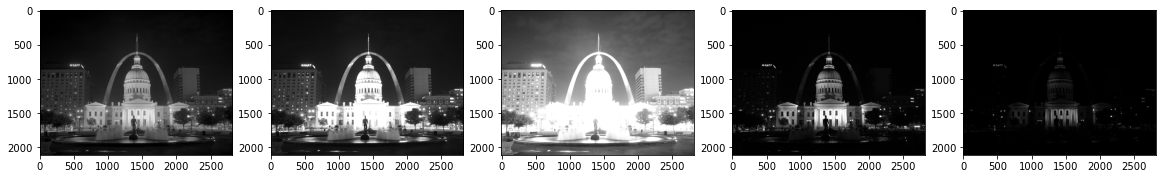

In [3]:
# Read the images
hdr_images = load_images_from_folder('../../images/HDR')

# Showing the images in subplots
size = len(hdr_images)
f, subplt = plt.subplots(1, size, figsize=(20, 20))
subplt[0].imshow(hdr_images[0], cmap="gray")
subplt[1].imshow(hdr_images[1], cmap="gray")
subplt[2].imshow(hdr_images[2], cmap="gray")
subplt[3].imshow(hdr_images[3], cmap="gray")
subplt[4].imshow(hdr_images[4], cmap="gray")
plt.show()

Next we will calculate mean of the images and display it.

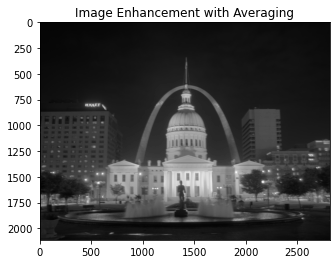

In [4]:
# Sum all images and divide it by the number of them to calculate the mean
mean_enhancment_img = sum(hdr_images) // size

# Showing the image in the plot
plt.imshow(mean_enhancment_img, cmap = 'gray')
plt.title('Image Enhancement with Averaging')
plt.show()

### Part B

In the next code snippet, first, we find each band using Haar wavelet transform, then we calculate the mean for LL band and select maximums for HL, LH, and HH bands. Finally, we apply the inverse of Haar wavelet transfrom and display the reconstructed version of the image.

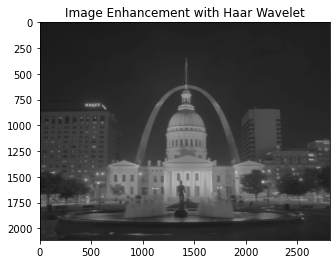

In [5]:
# Create empty lists for each band
LL = [None for i in range(size)]
HL = [None for i in range(size)]
LH = [None for i in range(size)]
HH = [None for i in range(size)]

for i in range(size):
    # Find each bands of i-th image
    LL[i], (HL[i], LH[i], HH[i]) = coeffs = pywt.dwt2(hdr_images[i], 'haar')

# Calculate mean of the LL bands
res_LL = sum(LL) // size

for i in range(size):
    # Assume first bands as maximum
    if(i == 0):
        res_HL = HL[i]
        res_LH = LH[i]
        res_HH = HH[i]
        continue
    # Update maximum by one-by-one comparing
    res_HL = np.maximum(HL[i], res_HL)
    res_LH = np.maximum(LH[i], res_LH)
    res_HH = np.maximum(HH[i], res_HH)

# Apply inverse of Haar wavelet transform
haar_enhancement_img = pywt.idwt2((res_LL, (res_HL, res_LH, res_HH)), 'haar')

# Showing the image in the plot
plt.imshow(haar_enhancement_img, cmap = 'gray')
plt.title('Image Enhancement with Haar Wavelet')
plt.show()

Then we will display each reconstructed version for comparison.

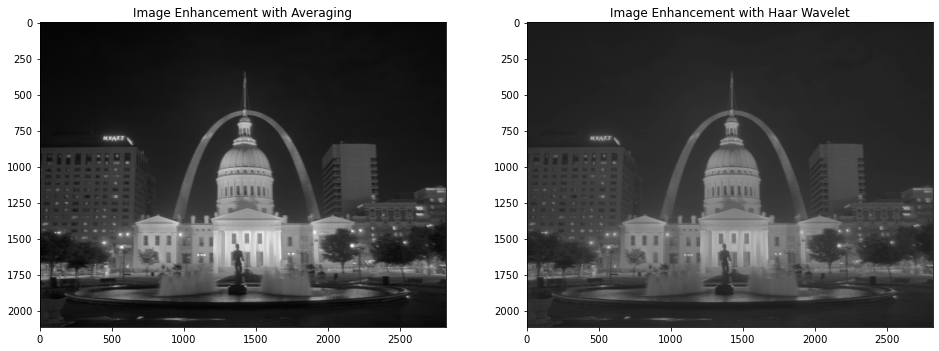

In [6]:
# Showing the images in subplots
f, subplt = plt.subplots(1,2,figsize = (16,8))
subplt[0].imshow(mean_enhancment_img, cmap = 'gray')
subplt[0].set_title('Image Enhancement with Averaging')
subplt[1].imshow(haar_enhancement_img, cmap = 'gray')
subplt[1].set_title('Image Enhancement with Haar Wavelet')
plt.show()

First reconstructed image has higher contrast which is better for human visual system but on the other hand second version has more details because we manually selected maximum of each sub-band. So it is possible that after applying some adjustments (like histogram equalization) the second version will be better than first one.

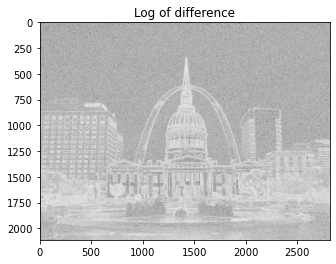

In [7]:
# Showing the images in subplots
plt.imshow(np.log2(np.abs(np.exp(-15) + haar_enhancement_img - mean_enhancment_img)), cmap = 'gray')
plt.title('Log of difference')
plt.show()

We can see the log of difference of the two reconstructed version, we can conclude Haar method's result has more details and edges.